In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('covid_dataset/us-covid19/state_covid_data.csv')
data.head(2)

,Province_State,Confirmed,Deaths,Recovered,People_Hospitalized,date,Mortality
0,Alabama,365747,4872,202137.0,0.0,2021-01-01,0.013321
1,Alaska,47019,206,7165.0,0.0,2021-01-01,0.004381


In [109]:
nc_data = data[data['Province_State']=='North Carolina']
nc_data = nc_data.sort_values(by=['date'], ascending=True).reset_index()
nc_data.head(2)

,index,Province_State,Confirmed,Deaths,Recovered,People_Hospitalized,date,Mortality
0,11288,North Carolina,4570,89,0.0,331.0,2020-04-12,0.019475
1,11406,North Carolina,4886,94,0.0,313.0,2020-04-13,0.019239


In [110]:
daily_case = nc_data.loc[0:,'Confirmed'].values
daily_death = nc_data.loc[0:,'Deaths'].values
daily_recov = nc_data.loc[0:,'Recovered'].values
daily_hosp = nc_data.loc[0:,'People_Hospitalized'].values
dates = nc_data.loc[0:,'date'].values

<function matplotlib.pyplot.show(close=None, block=None)>

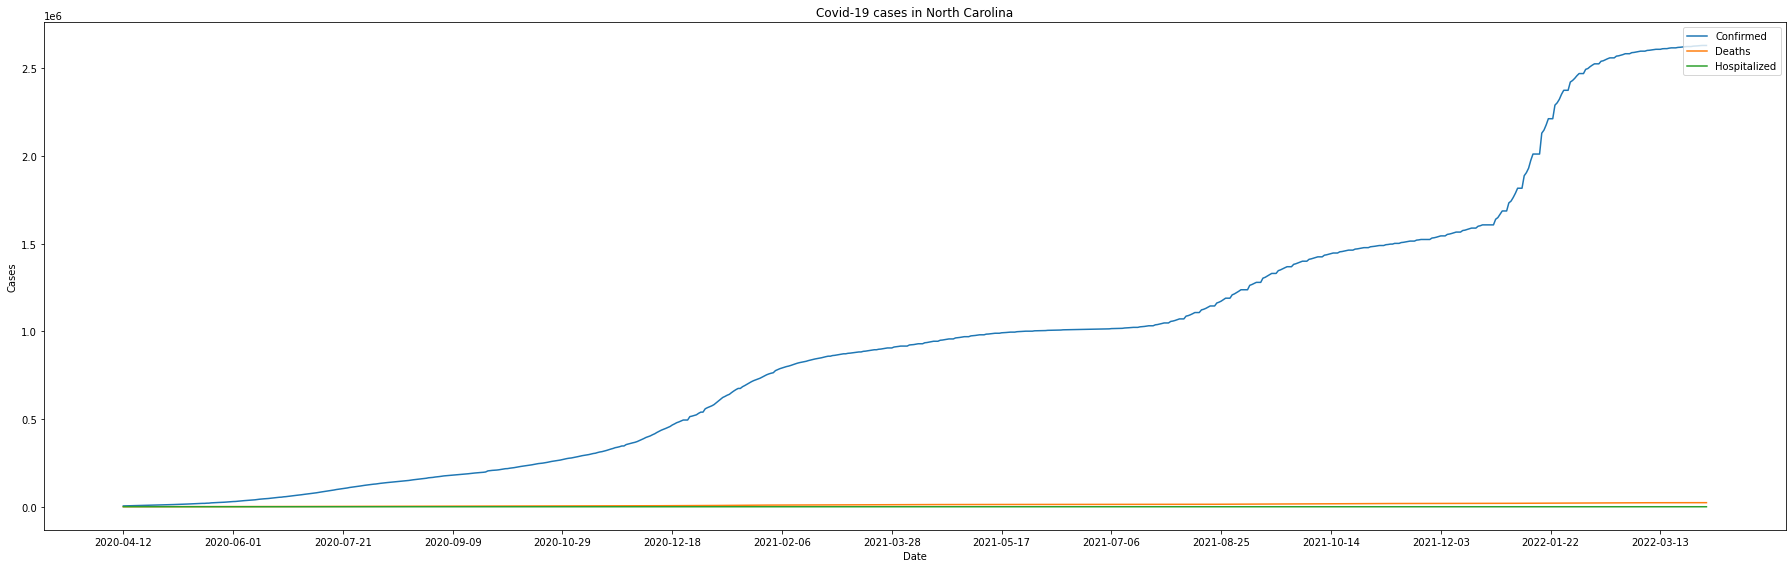

In [111]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_case, label = 'Confirmed')
plt.plot(dates,daily_death, label = 'Deaths')
# plt.plot(dates,daily_recov, label = 'Recovered')
plt.plot(dates,daily_hosp, label = 'Hospitalized')
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.title('Covid-19 cases in North Carolina')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/NC_cases.pdf')
plt.show

In [112]:
sc_data = data[data['Province_State']=='South Carolina']
sc_data = sc_data.sort_values(by=['date'], ascending=True).reset_index()
sc_data.head(2)

,index,Province_State,Confirmed,Deaths,Recovered,People_Hospitalized,date,Mortality
0,11296,South Carolina,3320,82,0.0,496.0,2020-04-12,0.024699
1,11415,South Carolina,3391,82,0.0,496.0,2020-04-13,0.024182


In [113]:
sc_daily_case = sc_data.loc[0:,'Confirmed'].values
sc_daily_death = sc_data.loc[0:,'Deaths'].values
sc_daily_recov = sc_data.loc[0:,'Recovered'].values
sc_daily_hosp = sc_data.loc[0:,'People_Hospitalized'].values

In [114]:
from scipy.stats import wilcoxon

In [115]:
w, p = wilcoxon(daily_case, sc_daily_case)
w,p

(0.0, 7.370469223393514e-120)

In [116]:
w, p = wilcoxon( sc_daily_death, daily_death)
w, p

(167.5, 1.4786484674204864e-119)

<function matplotlib.pyplot.show(close=None, block=None)>

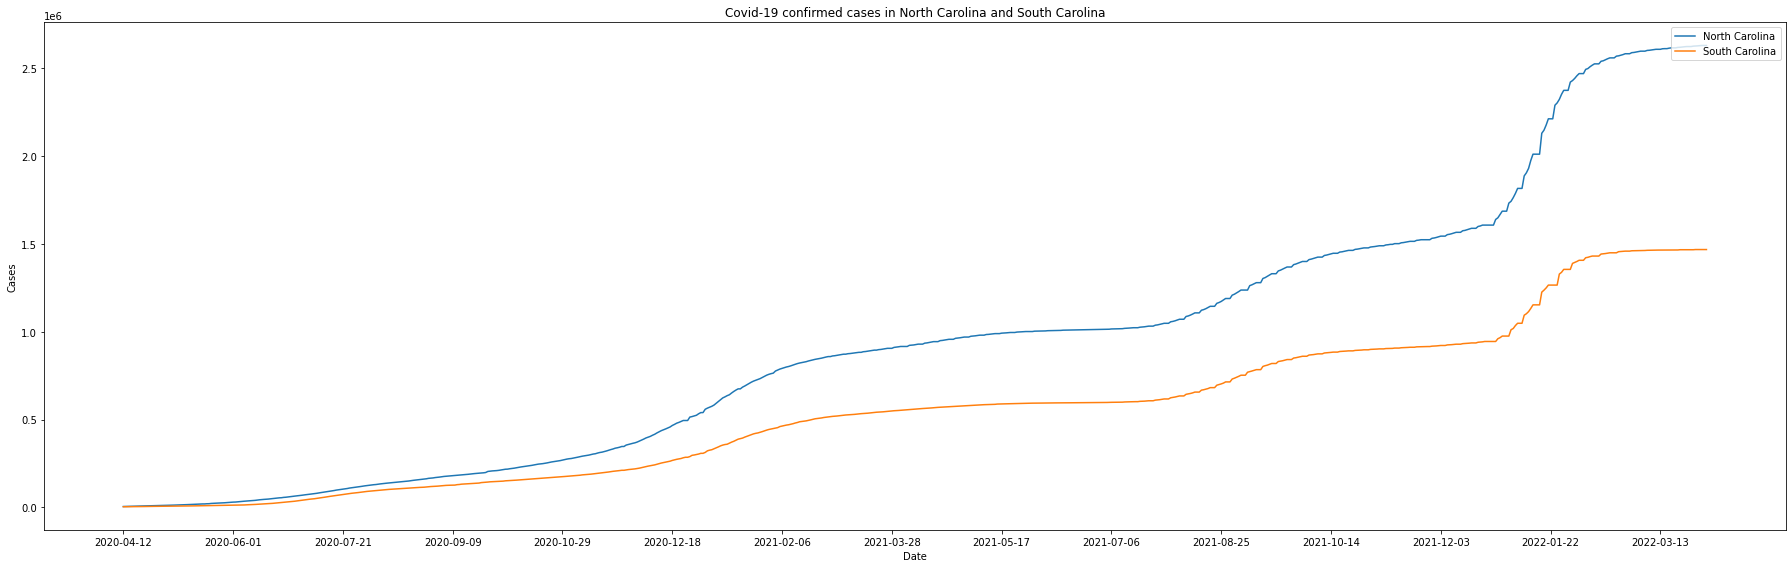

In [117]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_case, label = 'North Carolina')
plt.plot(dates,sc_daily_case, label = 'South Carolina')
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.title('Covid-19 confirmed cases in North Carolina and South Carolina')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/NC_SC_cases.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

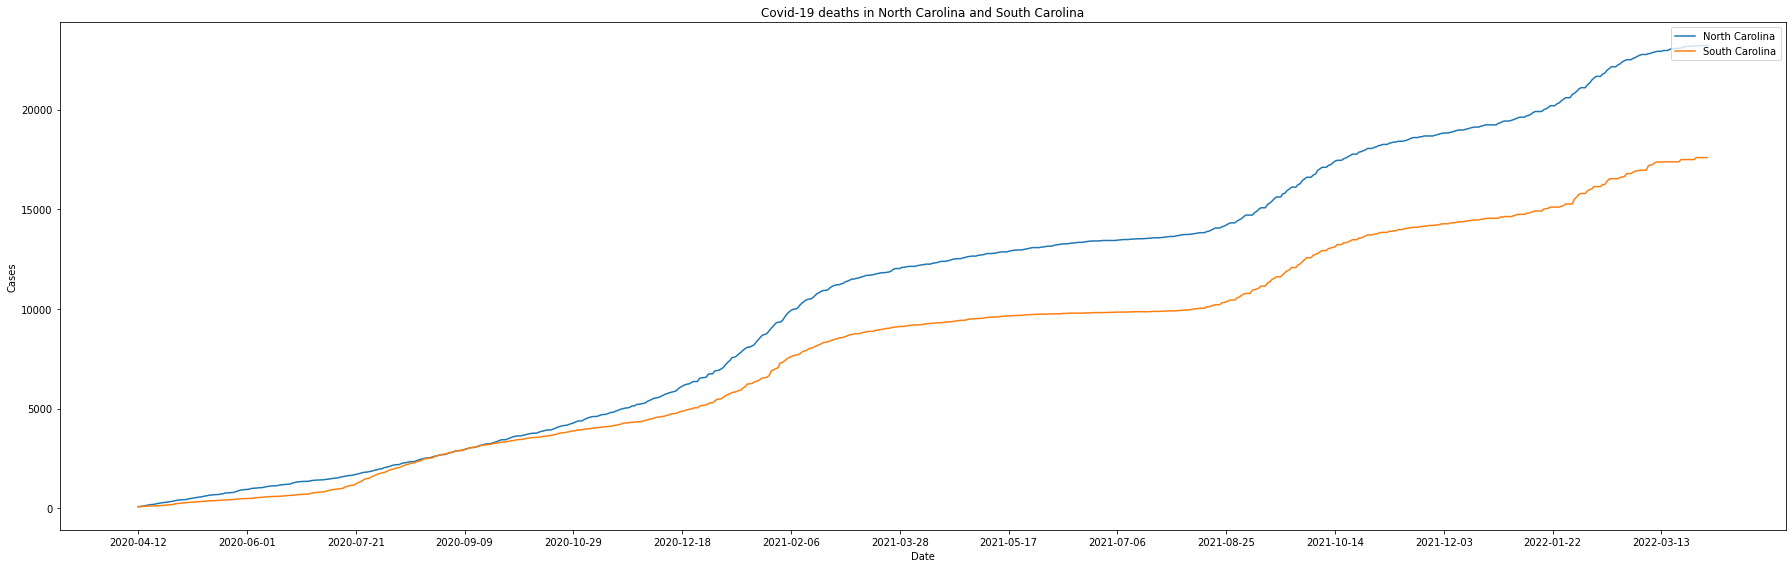

In [118]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_death, label = 'North Carolina')
plt.plot(dates,sc_daily_death, label = 'South Carolina')
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.title('Covid-19 deaths in North Carolina and South Carolina')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/NC_SC_deaths.pdf')
plt.show

## CASES by AGE GROUP

In [83]:
nc_age_case = pd.read_csv('covid_dataset/us-covid19/cases_by_age_group.csv')
nc_age_case.head(2)

,Age Group,Percent of cases,Count of cases,Percent of US population
0,0-4 Years,3.2,2259676,6.0
1,5-11 Years,6.7,4680687,8.7


In [84]:
nc_age_death = pd.read_csv('covid_dataset/us-covid19/deaths_by_age_group.csv', sep='\t')
nc_age_death.head(2)

,Age Group,Percentage of deaths,Count of deaths,Percent of US population
0,0-4 Years,0.10,444,6.0
1,5-11 Years,0.08,344,8.7


In [85]:
AGE = list(nc_age_case['Age Group'])
CASE = list(nc_age_case['Percent of cases'])
DEATH = list(nc_age_death['Percentage of deaths'])

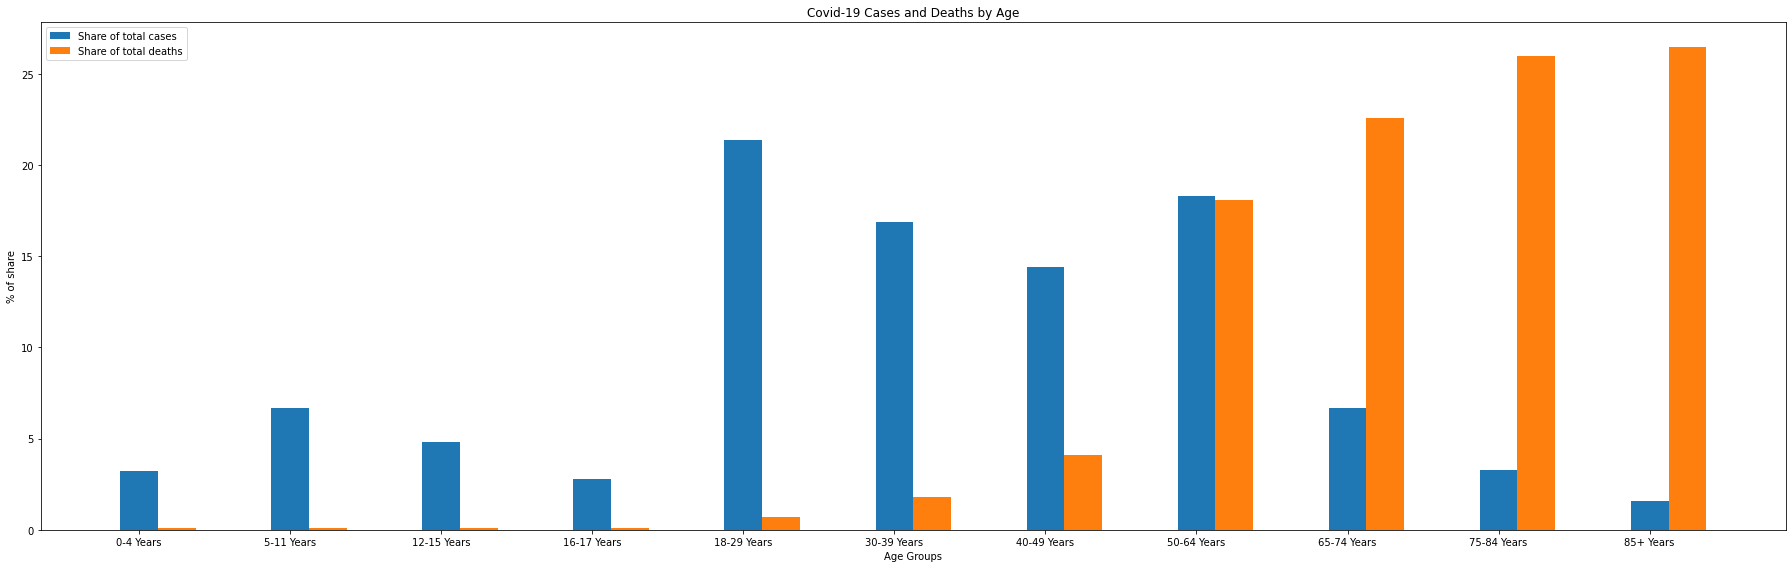

In [94]:
plt.figure(figsize=(25,8))
ind = np.arange(len(AGE))
width = 0.25

plt.bar(ind, CASE, width, label = 'Share of total cases')
plt.bar(ind+width, DEATH, width, label = 'Share of total deaths')
  
plt.xticks(X_axis, AGE)
plt.xlabel("Age Groups")
plt.ylabel("% of share")
plt.title("Covid-19 Cases and Deaths by Age")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig('figures/US_cases_by_age.pdf')
plt.show()